In [41]:
import numpy as np
import pandas as pd
from collections import Counter
import itertools
import matplotlib.pyplot as plt

In [42]:
np.set_printoptions(suppress=True)

In [43]:
Griseofulvin = [128, 64, 32, 16, 8, 4]
Camptothecin = [32, 16, 8, 4, 2, 1]
Chloramphenicol = [3200, 1600, 800, 400, 200, 100]
Metformin = [512, 256, 128, 64, 32, 16]

In [44]:
all_drugs = [Griseofulvin, Camptothecin, Chloramphenicol, Metformin]

In [45]:
all_combinations = list(itertools.product(*all_drugs))

In [46]:
all_combinations = np.array(all_combinations)

In [47]:
all_combinations[0:5]

array([[ 128,   32, 3200,  512],
       [ 128,   32, 3200,  256],
       [ 128,   32, 3200,  128],
       [ 128,   32, 3200,   64],
       [ 128,   32, 3200,   32]])

In [48]:
potency_all = []
for c in all_combinations:
    drug_1 = c[0]
    drug_2 = c[1]
    drug_3 = c[2]
    drug_4 = c[3]
    noise_max = (drug_1 + drug_2 + drug_3 + drug_4) + 10
    potency = np.log(drug_1/4 + drug_2 + drug_3/100 + drug_4/100 + drug_1*drug_4 + drug_2*drug_4+drug_3*drug_4+1) + np.random.randint(noise_max)
    potency_all.append(potency)

In [49]:
len(potency_all)

1296

In [50]:
potency_all = np.array(potency_all)

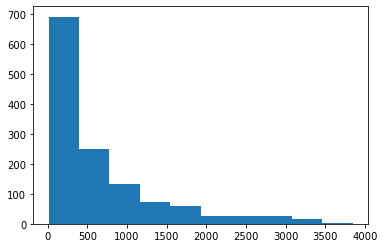

In [51]:
plt.hist(potency_all)
plt.show()

In [52]:
potency_all[potency_all<2000] = (potency_all[potency_all<2000]-min(potency_all[potency_all<2000]))/(max(potency_all[potency_all<2000])-min(potency_all[potency_all<2000]))
potency_all[potency_all>=2000] = 1

In [53]:
potency_all[0:10]

array([1.        , 0.17473273, 0.45143764, 0.67635223, 1.        ,
       0.08886585, 1.        , 0.3700043 , 0.09059121, 0.6699934 ])

In [54]:
viability_all = 1 - np.round(potency_all.reshape(-1, 1),3)

In [55]:
viability_all[0:10]

array([[0.   ],
       [0.825],
       [0.549],
       [0.324],
       [0.   ],
       [0.911],
       [0.   ],
       [0.63 ],
       [0.909],
       [0.33 ]])

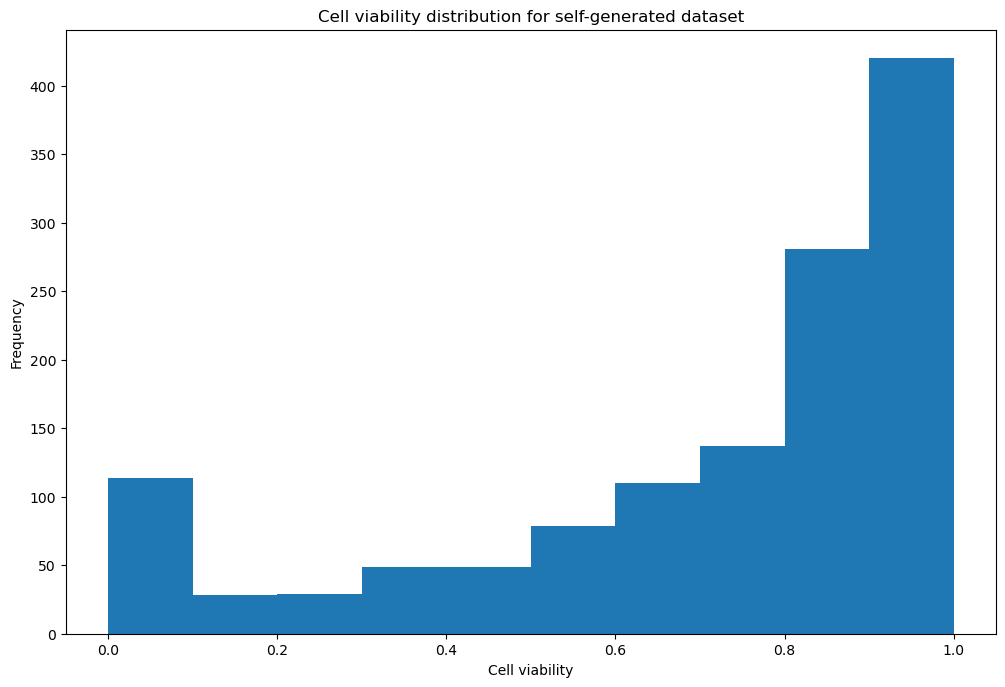

In [56]:
plt.figure(figsize=(12, 8), dpi=100)
plt.hist(viability_all)
plt.title("Cell viability distribution for self-generated dataset")
plt.xlabel("Cell viability")
plt.ylabel("Frequency")
plt.show()

In [57]:
viability_all = np.round(viability_all, 3)

In [58]:
output = np.concatenate((all_combinations, viability_all), axis = 1)

In [59]:
output.shape

(1296, 5)

In [60]:
DF = pd.DataFrame(output, columns = ['(+)-Griseofulvin', '(S)-(+)-Camptothecin', 'Chloramphenicol', 'Metformin', 'Cell viability'])

In [61]:
DF.head()

,(+)-Griseofulvin,(S)-(+)-Camptothecin,Chloramphenicol,Metformin,Cell viability
0,128.0,32.0,3200.0,512.0,0.000
1,128.0,32.0,3200.0,256.0,0.825
2,128.0,32.0,3200.0,128.0,0.549
3,128.0,32.0,3200.0,64.0,0.324
4,128.0,32.0,3200.0,32.0,0.000


In [62]:
DF.to_csv("Our_drug_simulation_dataset.csv")

In [63]:
read_check = pd.read_csv("Our_drug_simulation_dataset.csv", header = 0)

In [64]:
read_check.head()

,Unnamed: 0,(+)-Griseofulvin,(S)-(+)-Camptothecin,Chloramphenicol,Metformin,Cell viability
0,0,128.0,32.0,3200.0,512.0,0.000
1,1,128.0,32.0,3200.0,256.0,0.825
2,2,128.0,32.0,3200.0,128.0,0.549
3,3,128.0,32.0,3200.0,64.0,0.324
4,4,128.0,32.0,3200.0,32.0,0.000


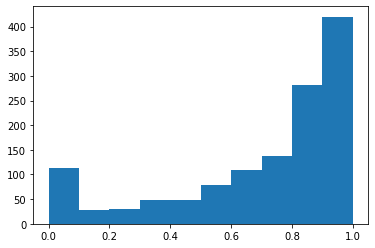

In [65]:
plt.hist(read_check.loc[:, "Cell viability"])
plt.show()

In [66]:
read_check.shape

(1296, 6)